## Creating the Runge-Kutta Fourth Order Function
The code below is created for a simple, unforced, second order ODE. This program is meant to work with the function for the project prep. 

The code below is not tailored to take into account any of the damped scenarios, but it was a cruicial first step for creating the final product.

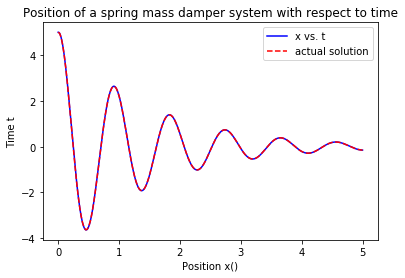

In [38]:
from math import *
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt
%matplotlib inline
from tabulate import tabulate

#These functions exist whenever the system is unforced
ffunc = lambda v: v
gfunc = lambda x,v: Ft-(c/m)*v-(k/m)*x

def rk4(x0,v0,h):
    K1=h*ffunc(v0)
    L1=h*gfunc(x0,v0)
    K2=h*ffunc(v0+L1/2)
    L2=h*gfunc(x0+K1/2,v0+L1/2)
    K3=h*ffunc(v0+L2/2)
    L3=h*gfunc(x0+K2/2,v0+L2/2)
    K4=h*ffunc(v0+L3)
    L4=h*gfunc(x0+K3,v0+L3)
    x=x0+(1/6)*(K1+2*K2+2*K3+K4)
    v=v0+(1/6)*(L1+2*L2+2*L3+L4)
    return x,v;

Ft = 0
m = 1
c = 1.4
k = 48
startT = 0
stopT = 5
t = np.arange(startT,stopT,0.00001)
n = len(t)
x = np.zeros(n)
v = np.zeros(n)
x[0] = 5
v[0] = 1
h = (stopT-startT)/(n-1.)

for i in range(0,n-1):
    x[i+1],v[i+1]=rk4(x[i],v[i],h)

def dU_dx(U,x):                                     #This function is here to generate the real curve in order to compare
    return [U[1], Ft-(c/m)*U[1]-(k/m)*U[0]]
U0=[x[0],v[0]]   #initial values
xs=np.linspace(startT,stopT,200)
Us=odeint(dU_dx, U0, xs)
ys = Us[:,0]
    
plt.plot(t,x,'-',label="x vs. t",color="b")
plt.plot(xs,ys,'--',label="actual solution",color="r")
plt.xlabel('Position x()')
plt.ylabel('Time t')
plt.title('Position of a spring mass damper system with respect to time')
plt.legend()
plt.show()

## Altering the code to fit the proper, unforced function.
After the RK4 function was made, I had to alter it for the function that was specified in the 'project_requirements' file.
The following program has swapped the previous variables for the natural frequency, $\omega_n$, and the damping constant, $c$.

### How does it work?
What the program is meant to do is take the $\omega_n$, $F(t)$, $m$, and $c$ values in order to generate the desired plots.
The value for the critical damping constant, $c_c$, is calculated, and that value is in turn used to calculate the value of $\zeta$.

First, the program takes the inputed values and uses the RK4 function to create the approximated velocity and position graphs. This is done by using a loop and lambda functions to repeat the RK4 operation for every step.

Afterwards, the program uses the calculated value for $\zeta$ in order to determine what damping condition the function is in. The if statements exist to create an accurate graph of the function for comparison. This is done by using the $x(t)$ and $v(t)$ functions from the 'project_background' file.

The three following cells will demonstrate that the code works for all three scenarios by printing position and velocity graphs.

damped


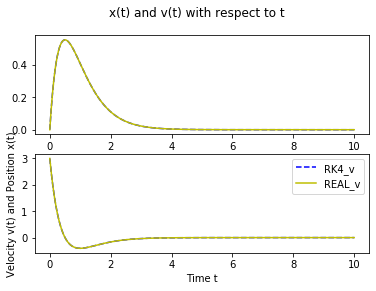

In [21]:
#Unforced Critical Dampening
ffunc = lambda t,v: v      
gfunc = lambda t,x,v: Ft/m-(2*z*natF)*v-(natF**2)*x
def rk4(t0,x0,v0,h):                  #rk4 NEEDS TO BE MODIFIED TO INCLUDE TIME
    K1=h*ffunc(t0,v0)
    L1=h*gfunc(t0,x0,v0)
    K2=h*ffunc(t0+h/2,v0+L1/2)
    L2=h*gfunc(t0+h/2,x0+K1/2,v0+L1/2)
    K3=h*ffunc(t0+h/2,v0+L2/2)
    L3=h*gfunc(t0+h/2,x0+K2/2,v0+L2/2)
    K4=h*ffunc(t0+h,v0+L3)
    L4=h*gfunc(t0+h,x0+K3,v0+L3)
    x=x0+(1/6)*(K1+2*K2+2*K3+K4)
    v=v0+(1/6)*(L1+2*L2+2*L3+L4)
    return x,v;

def underdamped(x0,v0,natF,z,t):
    A = x0
    B = v0
    D1 = A
    wD = natF*sqrt(1-z**2)
    D2 = (B+A*z*natF)/wD
    k=0
    for j in t:
        evar = -z*natF*j
        ins = wD*j
        xreal[k] = exp(evar)*(D1*cos(ins)+D2*sin(ins))
        vreal[k] = exp(evar)*(-D1*(wD*sin(ins)+z*natF*cos(ins))+D2*(wD*cos(ins)-z*natF*sin(ins)))
        k += 1
    return xreal, vreal;

def critdamped(x0,v0,natF,z,t):
    A=x0
    B=v0
    C1=A
    C2=B-natF*A
    k=0
    for j in t:
        xreal[k] = C1*exp(-natF*j)+C2*j*exp(-natF*j)
        vreal[k] = exp(-natF*j)*((-natF*C1)+C2*(1-natF*j))
        k += 1
    return xreal, vreal;

def overdamped(x0,v0,natF,z,t):
    A=x0
    B=v0
    lam1=-natF*(z-sqrt(z**2-1))
    lam2=-natF*(z+sqrt(z**2-1))
    C1=(B-A*lam2)/(lam1-lam2)
    C2=(A*lam1-B)/(lam1-lam2)
    k=0
    for j in t:
        if k > len(xreal):
            break
        xreal[k]=C1*exp(lam1*j)+C2*exp(lam2*j)
        vreal[k]=C1*lam1*exp(lam1*j)+C2*lam2*exp(lam2*j)
        k+=1
    return xreal, vreal;

m = 2
startT = 0
stopT = 10
t = np.arange(startT,stopT,0.001)   #Instead of choosing the amount of steps, I just choose the step size
n = len(t)     #1000000
x = np.zeros(n)
v = np.zeros(n)
xreal = np.zeros(n)
vreal = np.zeros(n)
x[0] = 0.       #Initial position
v[0] = 3.       #Initial velocity
xreal[0]=x[0]
vreal[0]=v[0]
h = (stopT-startT)/(n-1.)
A = 0  #Constant
B = 0  #Multiplier
C = 0  #Exponent
for i in range(0,n-1):    #These values allow for every value of f(t) to be calculated
    Ft = A+B*t[i]**C
natF = 2
c = 8           #This damping constant is chosen and impacts zeta
c_critical = 2*m*natF
z = c/c_critical #Zeta is calculated and depends on other values.

for i in range(0,n-1):                 #This loop gets the RK4 values
    x[i+1],v[i+1]=rk4(t[i],x[i],v[i],h)
#These if statements assign the ACTUAL values
if z<1: #Underdamped Scenario
    print(f'Underdamped')
    xreal,vreal = underdamped(x[0],v[0],natF,z,t)
if z==1: #Critical Scenario
    print(f'damped')
    xreal,vreal = critdamped(x[0],v[0],natF,z,t)
if z>1: #Overdamped Scenario
    print(f'Overdamped')
    xreal,vreal = overdamped(x[0],v[0],natF,z,t)
    
fig, rkplot = plt.subplots(2)   #This code is simply here to allow for multiple plots and has no impact upon the function

rkplot[0].plot(t,x,'--',label="RK4_x",color="b")
rkplot[1].plot(t,v,'--',label="RK4_v",color="b")
rkplot[0].plot(t,xreal,'-',label="REAL_x",color="y")
rkplot[1].plot(t,vreal,'-',label="REAL_v",color="y")
plt.ylabel('Velocity v(t) and Position x(t)')
plt.xlabel('Time t')
fig.suptitle('x(t) and v(t) with respect to t')

plt.legend()
plt.show()
#The problem may potentialy be that the critical dampening constant is not calculated

Underdamped


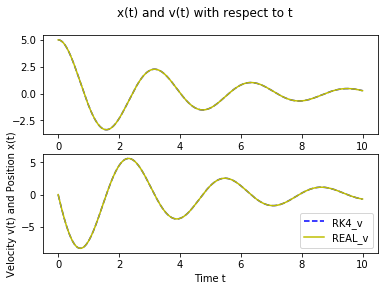

In [22]:
#Unforced Underdamped
ffunc = lambda t,v: v      
gfunc = lambda t,x,v: Ft/m-(2*z*natF)*v-(natF**2)*x
def rk4(t0,x0,v0,h):                  #rk4 NEEDS TO BE MODIFIED TO INCLUDE TIME
    K1=h*ffunc(t0,v0)
    L1=h*gfunc(t0,x0,v0)
    K2=h*ffunc(t0+h/2,v0+L1/2)
    L2=h*gfunc(t0+h/2,x0+K1/2,v0+L1/2)
    K3=h*ffunc(t0+h/2,v0+L2/2)
    L3=h*gfunc(t0+h/2,x0+K2/2,v0+L2/2)
    K4=h*ffunc(t0+h,v0+L3)
    L4=h*gfunc(t0+h,x0+K3,v0+L3)
    x=x0+(1/6)*(K1+2*K2+2*K3+K4)
    v=v0+(1/6)*(L1+2*L2+2*L3+L4)
    return x,v;

def underdamped(x0,v0,natF,z,t):
    A = x0
    B = v0
    D1 = A
    wD = natF*sqrt(1-z**2)
    D2 = (B+A*z*natF)/wD
    k=0
    for j in t:
        evar = -z*natF*j
        ins = wD*j
        xreal[k] = exp(evar)*(D1*cos(ins)+D2*sin(ins))
        vreal[k] = exp(evar)*(-D1*(wD*sin(ins)+z*natF*cos(ins))+D2*(wD*cos(ins)-z*natF*sin(ins)))
        k += 1
    return xreal, vreal;

def critdamped(x0,v0,natF,z,t):
    A=x0
    B=v0
    C1=A
    C2=B-natF*A
    k=0
    for j in t:
        xreal[k] = C1*exp(-natF*j)+C2*j*exp(-natF*j)
        vreal[k] = exp(-natF*j)*((-natF*C1)+C2*(1-natF*j))
        k += 1
    return xreal, vreal;

def overdamped(x0,v0,natF,z,t):
    A=x0
    B=v0
    lam1=-natF*(z-sqrt(z**2-1))
    lam2=-natF*(z+sqrt(z**2-1))
    C1=(B-A*lam2)/(lam1-lam2)
    C2=(A*lam1-B)/(lam1-lam2)
    k=0
    for j in t:
        if k > len(xreal):
            break
        xreal[k]=C1*exp(lam1*j)+C2*exp(lam2*j)
        vreal[k]=C1*lam1*exp(lam1*j)+C2*lam2*exp(lam2*j)
        k+=1
    return xreal, vreal;

m = 2
startT = 0
stopT = 10
t = np.arange(startT,stopT,0.001)   #Instead of choosing the amount of steps, I just choose the step size
n = len(t)     #1000000
x = np.zeros(n)
v = np.zeros(n)
xreal = np.zeros(n)
vreal = np.zeros(n)
x[0] = 5.       #Initial position
v[0] = 0.       #Initial velocity
xreal[0]=x[0]
vreal[0]=v[0]
h = (stopT-startT)/(n-1.)
A = 0  #Constant
B = 0  #Multiplier
C = 0  #Exponent
for i in range(0,n-1):    #These values allow for every value of f(t) to be calculated
    Ft = A+B*t[i]**C
natF = 2
c = 1           #This damping constant is chosen and impacts zeta
c_critical = 2*m*natF
z = c/c_critical #Zeta is calculated and depends on other values.

for i in range(0,n-1):                 #This loop gets the RK4 values
    x[i+1],v[i+1]=rk4(t[i],x[i],v[i],h)
#These if statements assign the ACTUAL values
if z<1: #Underdamped Scenario
    print(f'Underdamped')
    xreal,vreal = underdamped(x[0],v[0],natF,z,t)
if z==1: #Critical Scenario
    print(f'damped')
    xreal,vreal = critdamped(x[0],v[0],natF,z,t)
if z>1: #Overdamped Scenario
    print(f'Overdamped')
    xreal,vreal = overdamped(x[0],v[0],natF,z,t)
    
fig, rkplot = plt.subplots(2)   #This code is simply here to allow for multiple plots and has no impact upon the function

rkplot[0].plot(t,x,'--',label="RK4_x",color="b")
rkplot[1].plot(t,v,'--',label="RK4_v",color="b")
rkplot[0].plot(t,xreal,'-',label="REAL_x",color="y")
rkplot[1].plot(t,vreal,'-',label="REAL_v",color="y")
plt.ylabel('Velocity v(t) and Position x(t)')
plt.xlabel('Time t')
fig.suptitle('x(t) and v(t) with respect to t')

plt.legend()
plt.show()
#The problem may potentialy be that the critical dampening constant is not calculated

Overdamped


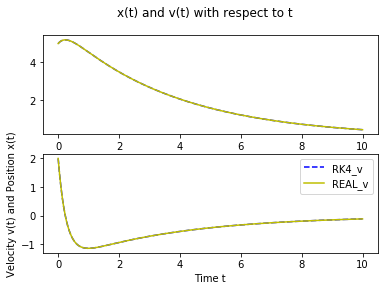

In [24]:
#Unforced Overdamped
ffunc = lambda t,v: v      
gfunc = lambda t,x,v: Ft/m-(2*z*natF)*v-(natF**2)*x
def rk4(t0,x0,v0,h):                  #rk4 NEEDS TO BE MODIFIED TO INCLUDE TIME
    K1=h*ffunc(t0,v0)
    L1=h*gfunc(t0,x0,v0)
    K2=h*ffunc(t0+h/2,v0+L1/2)
    L2=h*gfunc(t0+h/2,x0+K1/2,v0+L1/2)
    K3=h*ffunc(t0+h/2,v0+L2/2)
    L3=h*gfunc(t0+h/2,x0+K2/2,v0+L2/2)
    K4=h*ffunc(t0+h,v0+L3)
    L4=h*gfunc(t0+h,x0+K3,v0+L3)
    x=x0+(1/6)*(K1+2*K2+2*K3+K4)
    v=v0+(1/6)*(L1+2*L2+2*L3+L4)
    return x,v;

def underdamped(x0,v0,natF,z,t):
    A = x0
    B = v0
    D1 = A
    wD = natF*sqrt(1-z**2)
    D2 = (B+A*z*natF)/wD
    k=0
    for j in t:
        evar = -z*natF*j
        ins = wD*j
        xreal[k] = exp(evar)*(D1*cos(ins)+D2*sin(ins))
        vreal[k] = exp(evar)*(-D1*(wD*sin(ins)+z*natF*cos(ins))+D2*(wD*cos(ins)-z*natF*sin(ins)))
        k += 1
    return xreal, vreal;

def critdamped(x0,v0,natF,z,t):
    A=x0
    B=v0
    C1=A
    C2=B-natF*A
    k=0
    for j in t:
        xreal[k] = C1*exp(-natF*j)+C2*j*exp(-natF*j)
        vreal[k] = exp(-natF*j)*((-natF*C1)+C2*(1-natF*j))
        k += 1
    return xreal, vreal;

def overdamped(x0,v0,natF,z,t):
    A=x0
    B=v0
    lam1=-natF*(z-sqrt(z**2-1))
    lam2=-natF*(z+sqrt(z**2-1))
    C1=(B-A*lam2)/(lam1-lam2)
    C2=(A*lam1-B)/(lam1-lam2)
    k=0
    for j in t:
        if k > len(xreal):
            break
        xreal[k]=C1*exp(lam1*j)+C2*exp(lam2*j)
        vreal[k]=C1*lam1*exp(lam1*j)+C2*lam2*exp(lam2*j)
        k+=1
    return xreal, vreal;

m = 2
startT = 0
stopT = 10
t = np.arange(startT,stopT,0.001)   #Instead of choosing the amount of steps, I just choose the step size
n = len(t)     #1000000
x = np.zeros(n)
v = np.zeros(n)
xreal = np.zeros(n)
vreal = np.zeros(n)
x[0] = 5.       #Initial position
v[0] = 2.       #Initial velocity
xreal[0]=x[0]
vreal[0]=v[0]
h = (stopT-startT)/(n-1.)
A = 0  #Constant
B = 0  #Multiplier
C = 0  #Exponent
for i in range(0,n-1):    #These values allow for every value of f(t) to be calculated
    Ft = A+B*t[i]**C
natF = 1
c = 8           #This damping constant is chosen and impacts zeta
c_critical = 2*m*natF
z = c/c_critical #Zeta is calculated and depends on other values.

for i in range(0,n-1):                 #This loop gets the RK4 values
    x[i+1],v[i+1]=rk4(t[i],x[i],v[i],h)
#These if statements assign the ACTUAL values
if z<1: #Underdamped Scenario
    print(f'Underdamped')
    xreal,vreal = underdamped(x[0],v[0],natF,z,t)
if z==1: #Critical Scenario
    print(f'damped')
    xreal,vreal = critdamped(x[0],v[0],natF,z,t)
if z>1: #Overdamped Scenario
    print(f'Overdamped')
    xreal,vreal = overdamped(x[0],v[0],natF,z,t)
    
fig, rkplot = plt.subplots(2)   #This code is simply here to allow for multiple plots and has no impact upon the function

rkplot[0].plot(t,x,'--',label="RK4_x",color="b")
rkplot[1].plot(t,v,'--',label="RK4_v",color="b")
rkplot[0].plot(t,xreal,'-',label="REAL_x",color="y")
rkplot[1].plot(t,vreal,'-',label="REAL_v",color="y")
plt.ylabel('Velocity v(t) and Position x(t)')
plt.xlabel('Time t')
fig.suptitle('x(t) and v(t) with respect to t')

plt.legend()
plt.show()
#The problem may potentialy be that the critical dampening constant is not calculated

### Forcing the Function
A major issue with the current state of the code is that the RK4 is compared to the calculated graph, which only works with unforced scenarios. Therefore, in order to analyze forced graphs we need to use logic and physics to determine whether the resulting graph is correct and/or accurate.

damped


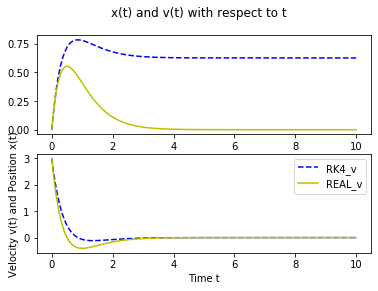

The forced position rests at 0.6250
The spring reached the maximum position at 0.7825807720999314


In [39]:
#Unforced Underdamped
ffunc = lambda t,v: v      
gfunc = lambda t,x,v: Ft/m-(2*z*natF)*v-(natF**2)*x
def rk4(t0,x0,v0,h):                  #rk4 NEEDS TO BE MODIFIED TO INCLUDE TIME
    K1=h*ffunc(t0,v0)
    L1=h*gfunc(t0,x0,v0)
    K2=h*ffunc(t0+h/2,v0+L1/2)
    L2=h*gfunc(t0+h/2,x0+K1/2,v0+L1/2)
    K3=h*ffunc(t0+h/2,v0+L2/2)
    L3=h*gfunc(t0+h/2,x0+K2/2,v0+L2/2)
    K4=h*ffunc(t0+h,v0+L3)
    L4=h*gfunc(t0+h,x0+K3,v0+L3)
    x=x0+(1/6)*(K1+2*K2+2*K3+K4)
    v=v0+(1/6)*(L1+2*L2+2*L3+L4)
    return x,v;

def underdamped(x0,v0,natF,z,t):
    A = x0
    B = v0
    D1 = A
    wD = natF*sqrt(1-z**2)
    D2 = (B+A*z*natF)/wD
    k=0
    for j in t:
        evar = -z*natF*j
        ins = wD*j
        xreal[k] = exp(evar)*(D1*cos(ins)+D2*sin(ins))
        vreal[k] = exp(evar)*(-D1*(wD*sin(ins)+z*natF*cos(ins))+D2*(wD*cos(ins)-z*natF*sin(ins)))
        k += 1
    return xreal, vreal;

def critdamped(x0,v0,natF,z,t):
    A=x0
    B=v0
    C1=A
    C2=B-natF*A
    k=0
    for j in t:
        xreal[k] = C1*exp(-natF*j)+C2*j*exp(-natF*j)
        vreal[k] = exp(-natF*j)*((-natF*C1)+C2*(1-natF*j))
        k += 1
    return xreal, vreal;

def overdamped(x0,v0,natF,z,t):
    A=x0
    B=v0
    lam1=-natF*(z-sqrt(z**2-1))
    lam2=-natF*(z+sqrt(z**2-1))
    C1=(B-A*lam2)/(lam1-lam2)
    C2=(A*lam1-B)/(lam1-lam2)
    k=0
    for j in t:
        if k > len(xreal):
            break
        xreal[k]=C1*exp(lam1*j)+C2*exp(lam2*j)
        vreal[k]=C1*lam1*exp(lam1*j)+C2*lam2*exp(lam2*j)
        k+=1
    return xreal, vreal;

m = 2
startT = 0
stopT = 10
t = np.arange(startT,stopT,0.001)   #Instead of choosing the amount of steps, I just choose the step size
n = len(t)     #1000000
x = np.zeros(n)
v = np.zeros(n)
xreal = np.zeros(n)
vreal = np.zeros(n)
x[0] = 0.       #Initial position
v[0] = 3.       #Initial velocity
xreal[0]=x[0]
vreal[0]=v[0]
h = (stopT-startT)/(n-1.)
A = 5  #Constant
B = 0  #Multiplier
C = 1  #Exponent
for i in range(0,n-1):    #These values allow for every value of f(t) to be calculated
    Ft = A+B*t[i]**C
natF = 2
c = 8           #This damping constant is chosen and impacts zeta
c_critical = 2*m*natF
z = c/c_critical #Zeta is calculated and depends on other values.

for i in range(0,n-1):                 #This loop gets the RK4 values
    x[i+1],v[i+1]=rk4(t[i],x[i],v[i],h)
#These if statements assign the ACTUAL values
if z<1: #Underdamped Scenario
    print(f'Underdamped')
    xreal,vreal = underdamped(x[0],v[0],natF,z,t)
if z==1: #Critical Scenario
    print(f'damped')
    xreal,vreal = critdamped(x[0],v[0],natF,z,t)
if z>1: #Overdamped Scenario
    print(f'Overdamped')
    xreal,vreal = overdamped(x[0],v[0],natF,z,t)
    
fig, rkplot = plt.subplots(2)   #This code is simply here to allow for multiple plots and has no impact upon the function

rkplot[0].plot(t,x,'--',label="RK4_x",color="b")
rkplot[1].plot(t,v,'--',label="RK4_v",color="b")
rkplot[0].plot(t,xreal,'-',label="REAL_x",color="y")
rkplot[1].plot(t,vreal,'-',label="REAL_v",color="y")
plt.ylabel('Velocity v(t) and Position x(t)')
plt.xlabel('Time t')
fig.suptitle('x(t) and v(t) with respect to t')

plt.legend()
plt.show()
print(f'The forced position rests at {x[9000]:.4f}')
print(f'The spring reached the maximum position at {max(x)}')
#The problem may potentialy be that the critical dampening constant is not calculated

The graph subplots above show 2 different aspects of the function. The RK4 values for both plots take the force into account, while the REAL values do not. What this means is that we can use all of the information to determine whether the RK4 values are correct.

We are told that the forced spring stops oscillating at position $x(t)=0.625m$. Logically speaking, since the force exerted is constant then it would be reasonable to conclude that the force exerted on the mass is equal to the force exerted by the spring at the time of settlment.

The various equations to take into account are:   
$F_s=kx$ : Hooke's Law   
$F(t)=5N$   : Force Constant for this problem  
$\omega_n=\sqrt(k/m)$ : Natural Frequency

We know that $\omega_n=2$ and $m=2kg$ for this problem, so we can determine that the spring constant is $k=8$.

The force exerted by the spring at $x=0.625m$ is equal to $F_s=5N$, which means that the forces do in fact equal each other and that the graphs are reliable.

### Nonconstant Force
The program works for forces that are constant, but we also need to prove that it can work when the force is variable. The following example will alternate between $F=0$ and $F=5$ every 5 seconds.

20000
Overdamped


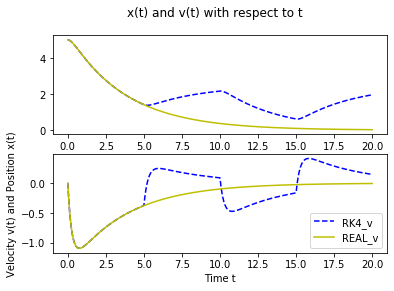

In [46]:
#Unforced Overdamped
ffunc = lambda t,v: v      
gfunc = lambda Ft,x,v: Ft/m-(2*z*natF)*v-(natF**2)*x
def rk4(t0,x0,v0,h):                  #rk4 NEEDS TO BE MODIFIED TO INCLUDE TIME
    K1=h*ffunc(t0,v0)
    L1=h*gfunc(t0,x0,v0)
    K2=h*ffunc(t0+h/2,v0+L1/2)
    L2=h*gfunc(t0+h/2,x0+K1/2,v0+L1/2)
    K3=h*ffunc(t0+h/2,v0+L2/2)
    L3=h*gfunc(t0+h/2,x0+K2/2,v0+L2/2)
    K4=h*ffunc(t0+h,v0+L3)
    L4=h*gfunc(t0+h,x0+K3,v0+L3)
    x=x0+(1/6)*(K1+2*K2+2*K3+K4)
    v=v0+(1/6)*(L1+2*L2+2*L3+L4)
    return x,v;

def underdamped(x0,v0,natF,z,t):
    A = x0
    B = v0
    D1 = A
    wD = natF*sqrt(1-z**2)
    D2 = (B+A*z*natF)/wD
    k=0
    for j in t:
        evar = -z*natF*j
        ins = wD*j
        xreal[k] = exp(evar)*(D1*cos(ins)+D2*sin(ins))
        vreal[k] = exp(evar)*(-D1*(wD*sin(ins)+z*natF*cos(ins))+D2*(wD*cos(ins)-z*natF*sin(ins)))
        k += 1
    return xreal, vreal;

def critdamped(x0,v0,natF,z,t):
    A=x0
    B=v0
    C1=A
    C2=B-natF*A
    k=0
    for j in t:
        xreal[k] = C1*exp(-natF*j)+C2*j*exp(-natF*j)
        vreal[k] = exp(-natF*j)*((-natF*C1)+C2*(1-natF*j))
        k += 1
    return xreal, vreal;

def overdamped(x0,v0,natF,z,t):
    A=x0
    B=v0
    lam1=-natF*(z-sqrt(z**2-1))
    lam2=-natF*(z+sqrt(z**2-1))
    C1=(B-A*lam2)/(lam1-lam2)
    C2=(A*lam1-B)/(lam1-lam2)
    k=0
    for j in t:
        if k > len(xreal):
            break
        xreal[k]=C1*exp(lam1*j)+C2*exp(lam2*j)
        vreal[k]=C1*lam1*exp(lam1*j)+C2*lam2*exp(lam2*j)
        k+=1
    return xreal, vreal;

m = 2
startT = 0
stopT = 20
t = np.arange(startT,stopT,0.001)   #Instead of choosing the amount of steps, I just choose the step size
n = len(t)
print(n)
x = np.zeros(n)
v = np.zeros(n)
xreal = np.zeros(n)
vreal = np.zeros(n)
x[0] = 5.       #Initial position
v[0] = 0.       #Initial velocity
xreal[0]=x[0]
vreal[0]=v[0]
h = (stopT-startT)/(n-1.)

#The force has been modified to make sure that it alternates between 0 and 5 every 5 seconds
Ft = np.zeros(20000)
Ft[5000:10000]=5
Ft[15000:20000]=5   

natF = 1
c = 8           #This damping constant is chosen and impacts zeta
c_critical = 2*m*natF
z = c/c_critical #Zeta is calculated and depends on other values.

for i in range(0,n-1):                 #This loop gets the RK4 values
    x[i+1],v[i+1]=rk4(Ft[i],x[i],v[i],h)
#These if statements assign the ACTUAL values
if z<1: #Underdamped Scenario
    print(f'Underdamped')
    xreal,vreal = underdamped(x[0],v[0],natF,z,t)
if z==1: #Critical Scenario
    print(f'damped')
    xreal,vreal = critdamped(x[0],v[0],natF,z,t)
if z>1: #Overdamped Scenario
    print(f'Overdamped')
    xreal,vreal = overdamped(x[0],v[0],natF,z,t)
    
fig, rkplot = plt.subplots(2)   #This code is simply here to allow for multiple plots and has no impact upon the function

rkplot[0].plot(t,x,'--',label="RK4_x",color="b")
rkplot[1].plot(t,v,'--',label="RK4_v",color="b")
rkplot[0].plot(t,xreal,'-',label="REAL_x",color="y")
rkplot[1].plot(t,vreal,'-',label="REAL_v",color="y")
plt.ylabel('Velocity v(t) and Position x(t)')
plt.xlabel('Time t')
fig.suptitle('x(t) and v(t) with respect to t')

plt.legend()
plt.show()
#The problem may potentialy be that the critical dampening constant is not calculated

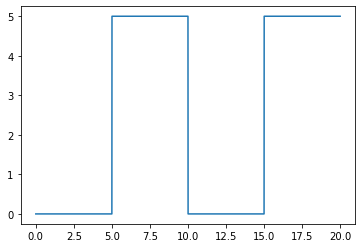